<a href="https://colab.research.google.com/github/erikrowens/Codecademy/blob/main/Test/us_medical_insurance_costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First project
Part of CodeAcademy Data Science career path. Portfolio project to analyse a CSV file containing insurance related data (sample below.)

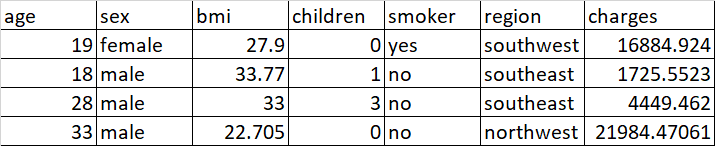

I will start by exploring the average cost of insurance by age group (decade by decade) to see if any interesting results appear.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Retrieve and store data
Class to get data from a CSV file and store the data into lists within a new object

In [ ]:
class InsuranceData:
  def __init__(self, csvfile):
    import csv

    self.age=[]
    self.sex=[]
    self.bmi=[]
    self.children=[]
    self.smoker=[]
    self.region=[]
    self.charges=[]

    with open(csvfile, newline='') as csvfile:
      reader = csv.DictReader(csvfile)
      for row in reader:
        self.age.append(int(row['age']))
        self.sex.append(row['sex'])
        self.bmi.append(float(row['bmi']))
        self.children.append(int(row['children']))
        '''
        convert the values in the smoker column to int
        so that we can sum and count more easily (code reusability)
        '''
        if row['smoker'] == 'yes':
          self.smoker.append(1)
        elif row['smoker'] == 'no':
          self.smoker.append(0)  
        self.region.append(row['region'])
        self.charges.append(float(row['charges']))


# Calculate the average insurance cost by age group
Parse the data to find out how many individual decades (10s, 20s, etc.) exist and then calculte the average insurance costs per age group. Returns a dict

In [ ]:
def group_by_decades(ages):
  interval = 10

  ages_by_decade = [int(np.floor(age/interval)*interval) for age in ages]

  decades = {}
  for decade in sorted(ages_by_decade):
    if decade not in decades:
      '''
      create key/value pair = decade/empty place holder = 0
      this is so that we can use this method for other purposes
      than simply the average cost per decade
      '''
      decades.update({decade: 0})

  return decades, ages_by_decade
  
def average_by_decade(ages, list_of_data):
  
  decades, ages_by_decade = group_by_decades(ages)
  
  new_data = list(zip(ages_by_decade, list_of_data))

  for decade in decades.keys():
    total = 0
    count = 0
    for decade_age in new_data:
      if decade_age[0] == decade:
        total += decade_age[1]
        count += 1
    if count > 0:
      average = total /count
    '''
    not currently handling cases where the count = 0 since the lists should not
    contain any
    '''
    #we can now update the key/value pair the average cost for the decade
    decades.update({decade: average})

  return decades

def average_by_region(regions, list_of_data):
  
  unique_regions = {}
  for new_region in sorted(regions):  
    if new_region not in unique_regions:
      '''
      create key/value pair = decade/empty place holder = 0
      this is so that we can use this method for other purposes
      than simply the average cost per decade
      '''
      unique_regions.update({new_region: 0})


def labelMaker(avgChargesByDecadeDict):
  labels = []
  keys = list(avgChargesByDecade.keys())
  i = 0
  for key in keys:
    if(i < len(keys)-1):
      labels.append(str(key)+" - "+str(keys[i+1]-1))
    else:
      labels.append(str(key)+" - "+str((key+10)-1))
    i+=1


  return labels

# Run the script

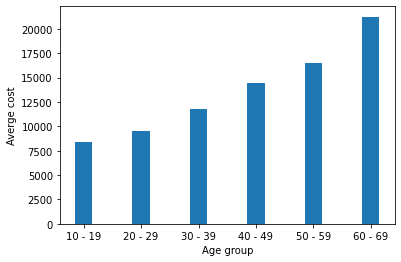

In [ ]:
insuranceData = InsuranceData('insurance.csv')
avgChargesByDecade = average_by_decade(insuranceData.age, insuranceData.charges)

#now plot the results to use for data exploration
plt.bar(list(avgChargesByDecade.keys()), list(avgChargesByDecade.values()), width=3)
plt.xlabel('Age group')
plt.ylabel('Averge cost')
labels = labelMaker(avgChargesByDecade)
plt.xticks(list(avgChargesByDecade.keys()), labels)
plt.show()

As we can see the average cost increases significantly decade by decade.

It could be interesting to find out why in our hypothetical data, the average cost increases so much decade by decade as we age. Are factors such as smoking, BMI, or children related? People in their teens may be more active and are less likely to have children than those in their 30s, 40s, or 50s.

# Smoking does not appear to explain the difference
As we can see the percentage of smokers per age group is fairly uniform with the exception of those in their 50s. But the percentage of smokers by itself does not explain the difference in costs between the 20s and 60s age groups as their percentage of smokers is faily close.

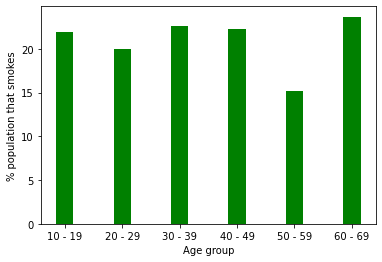

In [ ]:
avgNbrSmokers = average_by_decade(insuranceData.age, insuranceData.smoker)

for key in avgNbrSmokers.keys():
  avgNbrSmokers.update({key: round(avgNbrSmokers.get(key) * 100, 2)})

plt.bar(list(avgNbrSmokers.keys()), list(avgNbrSmokers.values()), width = 3, color='green')
plt.xlabel('Age group')
plt.ylabel('% population that smokes')
labels = labelMaker(avgNbrSmokers)
plt.xticks(list(avgNbrSmokers.keys()), labels)
plt.show()

# Average number of children per age group
The number of children per patient does not appear to explain the increase in costs decade by decade as those in their 60s have, on average, less children insured on their policy.

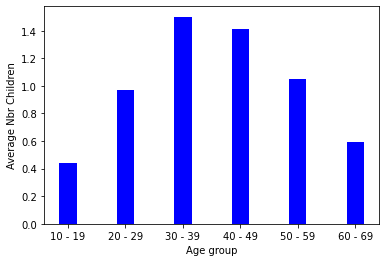

In [ ]:
avgChildren = average_by_decade(insuranceData.age, insuranceData.children)

plt.bar(list(avgChildren.keys()), list(avgChildren.values()), width = 3, color='blue')
plt.xlabel('Age group')
plt.ylabel('Average Nbr Children')
labels = labelMaker(avgChildren)
plt.xticks(list(avgChildren.keys()), labels)
plt.show()

# BMI?
Teh average BMI does increase decade by decade. At first glance there does not seem to be a strong correlation between the increase in average BMI and insurance costs.

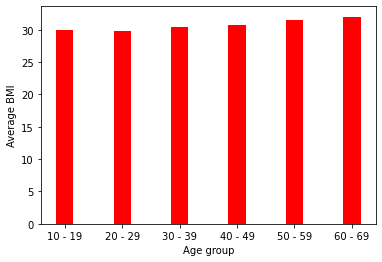

The average BMI for patients in their 10s is 29.97
The average BMI for patients in their 20s is 29.79
The average BMI for patients in their 30s is 30.44
The average BMI for patients in their 40s is 30.71
The average BMI for patients in their 50s is 31.51
The average BMI for patients in their 60s is 32.02


In [ ]:
avgBMI = average_by_decade(insuranceData.age, insuranceData.bmi)

plt.bar(list(avgBMI.keys()), list(avgBMI.values()), width = 3, color='red')
plt.xlabel('Age group')
plt.ylabel('Average BMI')
labels = labelMaker(avgBMI)
plt.xticks(list(avgBMI.keys()), labels)
plt.show()

for key in avgBMI.keys():
  print("The average BMI for patients in their "+str(key)+"s is "+str(round(avgBMI.get(key),2)))

# Conclusion
While I have not looked at the data by gender or region is seems that age remains the biggest factor to the change in insurance costs with a slight impact from BMI (which is also  age dependant) as well. Since I have not analysed costs by gender or region these two factors can not be ruled out. Region could have an impact as it is possible that there could be smaller populations in different regions thereby increasing the costs as there are less patients to pay in. 